In [37]:
import sys
from pathlib import Path

import matplotlib
import gtfstk as gt

DIR = Path('..')
sys.path.append(str(DIR))

DATA_DIR = DIR/'data/'

import transitanalyst as ta

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# Read and print feed

cairns_feed = ta.read_gtfs(
    DATA_DIR/'cairns_gtfs_20171018.zip', 
    'Thursday', 
    'km',
)

print(cairns_feed)

* agency --------------------
	  agency_name                agency_url     agency_timezone agency_lang  \
0   TransLink  http://www.sunbus.com.au  Australia/Brisbane          en   

  agency_phone  
0     13 12 30  
* calendar --------------------
	                       service_id  monday  tuesday  wednesday  thursday  \
0  CNS 17_18-CNS_MUL-M-Tu-W-Th-02       1        1          1         1   

   friday  saturday  sunday start_date  end_date  
0       0         0       0   20171016  20171228  
* calendar_dates --------------------
	                       service_id      date  exception_type
0  CNS 17_18-CNS_MUL-M-Tu-W-Th-02  20171225               2
1  CNS 17_18-CNS_MUL-M-Tu-W-Th-02  20171226               2
* fare_attributes --------------------
	None
* fare_rules --------------------
	None
* feed_info --------------------
	None
* frequencies --------------------
	None
* routes --------------------
	   route_id route_short_name  \
0  120N-849             120N   
1  131N-849        

In [39]:
# build a network and print one of the PT links

pt_net = ta.build_pt_network(
    feed = cairns_feed,
    convert_to_gpd = True,
)

pt_net.ptedge.head(1).T

,0
trip_id,10032142-CNS 17_18-CNS_MUL-M-Tu-W-Th-02
o_time,07:45:00
departure_time,07:45:00
o_stop,750053
o_sequence,1
pickup_type,0
drop_off_type,0
d_time,07:47:00
d_stop,750050
d_sequence,2


location number 0 has been calculated


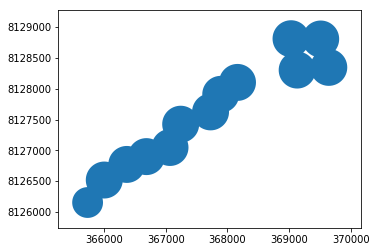

In [42]:
#Read a location into a gpd dataframe and print a catchment of 30 minutes
import geopandas as gpd

start_locations = gpd.read_file(str(DATA_DIR/"location.shp"))

iso = ta.abundant_access(
    pt_net,                 
    start_locations,  
    cut_off_times = [30],
    transfers = 1,
    polygon = True,
)

iso.plot()